In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
#matplotlib.use('TkAgg')
import math

In [2]:
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__) 

3.1.1
0.10.0


In [11]:
data = pd.read_csv('model1.csv', header=None).values
X_coordinate=data[1:, 1] 
Y_coordinate=data[1:, 2]
particle_energy=data[1:, 3]

In [12]:
for i in range(len(X_coordinate)):
    X_coordinate[i]=float(X_coordinate[i])
    Y_coordinate[i]=float(Y_coordinate[i])
    particle_energy[i]=float(particle_energy[i])

In [5]:
#yes=sns.distplot(X_coordinate, bins = 20, kde = 0, axlabel= 'значение X')


[4.004068 7.5850116 11.165955199999999 14.7468988 18.3278424 21.908786
 25.4897296 29.070673199999998 32.6516168 36.2325604 39.813503999999995
 43.39444759999999 46.975391200000004 50.5563348 54.1372784 57.718222
 61.299165599999995 64.88010919999999 68.4610528 72.0419964 75.62294]


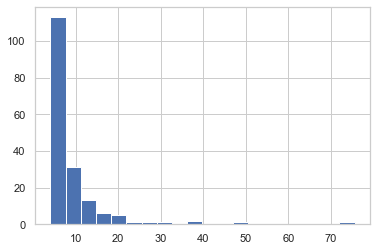

In [13]:
array = plt.hist(particle_energy, bins = 20)
print(array[1])

In [19]:
#n=len(array[0])

print(array[0])
x = []
s_energy=sorted(particle_energy, reverse = True)
count = 1
j=0
tmp = np.random.random((1, 3))
for i in range(len(s_energy)):
    while int(array[0][j]) == 0:
        j = j+1
        #print(j, ' ', array[0][j])
    if count < int(array[0][j]):
        x.append(tmp)
        count = count + 1      
    else:
        #print(i, ' ', s_energy[i], ' ', count, ' ', array[0][j])
        #print()
        j = j + 1
        x.append(tmp)
        tmp = np.random.random((1, 3))
        count = 1
        # print(i, ' ', s_energy[i], ' ', count, ' ', array[0][j])
        # print()
#print(x)
#print(len(particle_energy), ' ', len(x))
m = []

for i in range(len(x)):
    m.append(abs(x[i][0]))
    
#print(m)

[113.  31.  13.   6.   5.   1.   1.   1.   0.   2.   0.   0.   1.   0.
   0.   0.   0.   0.   0.   1.]


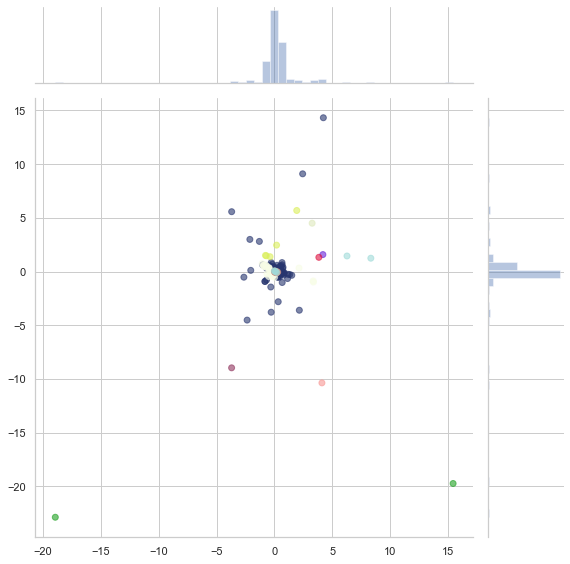

In [20]:
from itertools import product
sns.set(style="whitegrid")

#color = sns.color_palette()[5]

g = sns.jointplot(X_coordinate, Y_coordinate, stat_func=None,xlim=(0, 60), ylim=(0, 12), kind="scatter",color='b', height=8)

#Clear the axes containing the scatter plot
g.ax_joint.cla()
c=np.random.random((len(particle_energy), 3))
plt.sca(g.ax_joint)
markers = ['x','o']*len(particle_energy)
plt.scatter(X_coordinate, Y_coordinate, c = m, alpha = '0.6')


In [139]:
#k = sns.distplot(particle_energy, bins = 20, kde = 0, axlabel= 'значение X')
#k.text (-15, -10, u'backgroundcolor="yellow"', backgroundcolor=c[0])
#k.text (0.1, 1.1, u'color="blue"', color="blue")
#k.text (1.4, 1.0, u'color="r"', color="r")
#for i in range(len(array))

[113.  31.  13.   6.   5.   1.   1.   1.   0.   2.   0.   0.   1.   0.
   0.   0.   0.   0.   0.   1.]


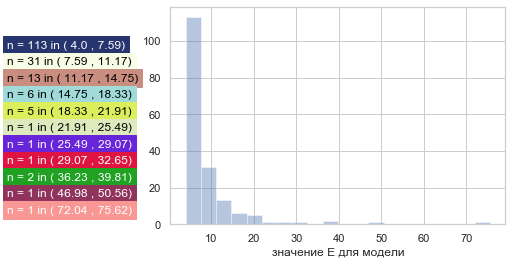

In [32]:
print(array[0])
#print(array[1])
k = sns.distplot(particle_energy, bins = 20, kde = 0, axlabel= 'значение E для модели')
s=0
y = 105
for i in range(len(array[0])):
    n = int(array[0][i])
    left = round(array[1][i], 2)
    right = round(array[1][i+1], 2)
    s = s + int(array[0][i])
    color = m[s-1]
    n_col = "white"
    if i>=1 and i<=5:
        n_col = "black"
    if n!=0:
        x = -38
        y = y - 9
        k.text (x, y, f'n = {n} in ( {left} , {right})',color=n_col,  backgroundcolor=color)
    #print(color, ' ', int(array[0][i]), ' ' , s)